<a href="https://colab.research.google.com/github/karsarobert/Deep-Learning-2022/blob/main/07/PTE_DL7_GYAK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning gyakorlat


## 7. gyakorlat: konvolúciós hálózat
### 2022. október 19.

In [ ]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 13.2 MB/s 
     |████████████████████████████████| 1.3 MB 52.0 MB/s 
     |████████████████████████████████| 441 kB 56.2 MB/s 
     |████████████████████████████████| 5.3 MB 37.5 MB/s 
     |████████████████████████████████| 115 kB 59.9 MB/s 
     |████████████████████████████████| 212 kB 31.1 MB/s 
     |████████████████████████████████| 163 kB 48.1 MB/s 
     |████████████████████████████████| 127 kB 47.6 MB/s 
     |████████████████████████████████| 7.6 MB 34.8 MB/s 
Mounted at /content/gdrive


In [ ]:
from fastbook import *

In [ ]:
from pathlib import Path
import requests

toyota_cars = ['4runner', 'land cruiser', 'rav4']
path = Path('/content/toyota')

if not path.exists():
  path.mkdir()

for toyota_car in toyota_cars:
  dest = (path/toyota_car)
  dest.mkdir(exist_ok=True)
  urls = search_images_ddg(f'toyota {toyota_car}', max_images=200)
  download_images(dest, urls=urls)

images_path = get_image_files(path)

# Ellenőrizzük a GPU-t

#Osszuk fel a fájlokat train és test készletre

#Töltsük be a képeket ImageDataGenerator segítségével

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = 
test_dir = 

train_datagen = 
test_datagen = 


train_data = train_datagen.flow_from_directory()

test_data = train_datagen.flow_from_directory()

#class_names listába töltsük be az osztályok neveit

In [ ]:
import pathlib
import numpy as np
data_dir = 
class_names = 
print(class_names)

['4runner' 'land cruiser' 'rav4']


#töltsük le a efficientnetb0 feature vektor modellt

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [ ]:
feature_extractor_layer = hub.KerasLayer()

#állítsuk össze a modellt

In [ ]:
model = tf.keras.Sequential([
    feature_extractor_layer, 
    layers.Dense() 
  ])

In [ ]:
model.summary()

In [ ]:
for layer_number, layer in enumerate(model.layers):
  print(layer_number, layer.name, layer.trainable)

0 feature_extraction_layer False
1 output_layer True


#model.compile, fit

In [ ]:
model.compile(loss=,
                           optimizer=,
                           metrics=)

# Fit EfficientNet model 
history = model.fit()

#rossz fájlok törlése

In [ ]:
from os import listdir
from PIL import Image

for dirpath,dirnames,filenames in os.walk(...):
    for filename in listdir():
      if filename.endswith():
        try:
          img = Image.open('./'+ ) # open the image file
          img.verify() # verify that it is, in fact an image
        except (IOError, SyntaxError) as e:
          print('Bad file:', ) # print out the names of corrupt files
          os.remove( + '/' + )
    print("There are {} directories and {} images in {}".format(len(dirnames),len(filenames),dirpath))


#nézzük meg a modell eredményeit

In [ ]:
# If you wanted to, you could really turn this into a helper function to load in with a helper.py script...
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

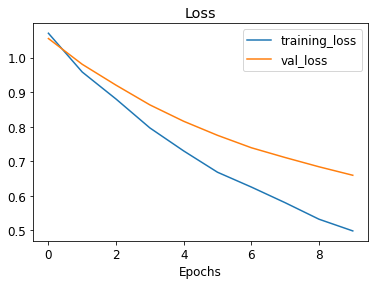

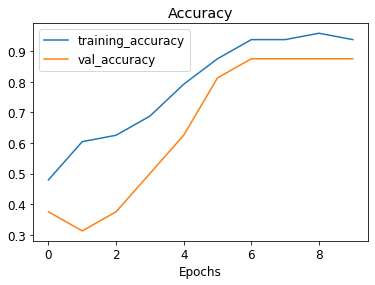

In [ ]:
plot_loss_curves(history)

#modell mentése

In [ ]:
model.save()

#modell betöltése

In [ ]:
model2 = tf.keras.models.load_model()

#Külső fájl betöltése és előkészítése

In [ ]:
def load_and_prep_image(filename, img_shape=224):
  
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3) #tensor formatum
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = tf.expand_dims(img, axis=0) 

  #img  = img[...,::-1]
  img -= [103, 116, 123]
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
image = load_and_prep_image("")

In [ ]:
pred = model.predict()

1/1 [==============================] - 0s 110ms/step


In [ ]:
pred

array([[0.07689689, 0.15735267, 0.76575047]], dtype=float32)

In [ ]:
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'4runner'

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 5.2 MB/s 
     |████████████████████████████████| 2.3 MB 54.4 MB/s 
     |████████████████████████████████| 57 kB 4.6 MB/s 
     |████████████████████████████████| 54 kB 3.0 MB/s 
     |████████████████████████████████| 270 kB 65.7 MB/s 
     |████████████████████████████████| 84 kB 3.1 MB/s 
     |████████████████████████████████| 112 kB 55.3 MB/s 
     |████████████████████████████████| 84 kB 2.7 MB/s 
     |████████████████████████████████| 55 kB 3.3 MB/s 
     |████████████████████████████████| 212 kB 53.0 MB/s 
     |████████████████████████████████| 63 kB 2.3 MB/s 
     |████████████████████████████████| 80 kB 9.7 MB/s 
     |████████████████████████████████| 68 kB 4.6 MB/s 
     |████████████████████████████████| 46 kB 3.4 MB/s 
     |████████████████████████████████| 4.0 MB 39.2 MB/s 
     |████████████████████████████████| 593 kB 56.

In [ ]:
import requests

labels = class_names.tolist()

def imagenet_convert(img):
  img  = img.astype(float)[...,::-1] # RGB --> BGR
  img -= [103.939, 116.779, 123.68]
  return img


def classify_image(inp):
  inp = inp.reshape((-1, 224, 224, 3))
  inp = imagenet_convert(inp)
  prediction = model2.predict(inp).flatten()
  confidences = {labels[i]: float(prediction[i]) for i in range(3)}
  return confidences
  


In [ ]:
import gradio as gr

gr.Interface(fn=classify_image, 
             inputs=gr.Image(shape=(224, 224)),
             outputs=gr.Label(num_top_classes=3)).launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://acec4740d73a2517.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f30b540e5d0>,
 'http://127.0.0.1:7864/',
 'https://acec4740d73a2517.gradio.app')

#Finom hangoláshoz NEM A FELADAT RÉSZE

In [ ]:

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = True

inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

x = base_model(inputs)

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

outputs = tf.keras.layers.Dense(3, activation="softmax", name="output_layer")(x)
model_0 = tf.keras.Model(inputs, outputs)


In [ ]:
# Freeze all layers except for the
for layer in base_model.layers[:-10]:
  layer.trainable = False

In [ ]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_4 False
1 rescaling_3 False
2 normalization_3 False
3 tf.math.truediv_3 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeez